<p>
  <b>AI Lab: Deep Learning for Computer Vision</b><br>
  <b><a href="https://www.wqu.edu/">WorldQuant University</a></b>
</p>

<div class="alert alert-success" role="alert">
  <p>
    <center><b>Usage Guidelines</b></center>
  </p>
  <p>
    This file is licensed under <a href="https://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International</a>.
  </p>
  <p>
    You <b>can</b>:
    <ul>
      <li><span style="color: green">✓</span> Download this file</li>
      <li><span style="color: green">✓</span> Post this file in public repositories</li>
    </ul>
    You <b>must always</b>:
    <ul>
      <li><span style="color: green">✓</span> Give credit to <a href="https://www.wqu.edu/">WorldQuant University</a> for the creation of this file</li>
      <li><span style="color: green">✓</span> Provide a <a href="https://creativecommons.org/licenses/by-nc-nd/4.0/">link to the license</a></li>
    </ul>
    You <b>cannot</b>:
    <ul>
      <li><span style="color: red">✗</span> Create derivatives or adaptations of this file</li>
      <li><span style="color: red">✗</span> Use this file for commercial purposes</li>
    </ul>
  </p>
  <p>
    Failure to follow these guidelines is a violation of your terms of service and could lead to your expulsion from WorldQuant University and the revocation your certificate.
  </p>
</div>

### Getting Ready

Let's get ready for this lesson by importing the packages we need.

In [1]:
import sys
from collections import Counter
from pathlib import Path

import PIL
import torch
import torchvision
import ultralytics
from IPython.display import Video
from PIL import Image
from torchvision import transforms
from torchvision.io import read_image
from torchvision.utils import make_grid
from ultralytics import YOLO

Next, we'll print out the version numbers for our libraries, including Python. We want to make sure that anyone who reviews our work knows exactly what software we used in case they want to reproduce our analysis.

In [2]:
print("Platform:", sys.platform)
print("Python version:", sys.version)
print("---")
print("PIL version : ", PIL.__version__)
print("torch version : ", torch.__version__)
print("torchvision version : ", torchvision.__version__)
print("ultralytics version : ", ultralytics.__version__)

Platform: linux
Python version: 3.11.0 (main, Nov 15 2022, 20:12:54) [GCC 10.2.1 20210110]
---
PIL version :  10.2.0
torch version :  2.2.2+cu121
torchvision version :  0.17.2+cu121
ultralytics version :  8.3.27


### Image detection with YOLO

In the previous project, we solved the problem of detecting if an image contains one object from a set of objects. For example, does the image contain a hog or not. But we know that images rarely just contain one object. Images often contain different objects and multiples of the same object. Imagine an image of a traffic scene that contains cars, trucks, pedestrians, traffic signs, and more. We need to use an object detection model. Object detection is the process of identifying and locating objects in an image or video.

We won't train an object detection algorithm from scratch but instead use a pretrained model. We'll use the YOLO (You Only Look Once) model. It's popular for its speed and accuracy. Lucky for us, the `ultralytics` package contains the YOLO model. We'll use the YOLO version 8 pretrained model.

In [3]:
yolo = YOLO(task="detect", model="yolov8s.pt")

What classes can this pretrained model detect? That's stored in `yolo.names`.

In [4]:
yolo.names

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

It's a dictionary that maps an integer to the class label. Let's see what 5 corresponds to.

In [5]:
yolo.names[5]

'bus'

**Task 3.3.1:** Determine the class that's assigned to integer 23?

In [5]:
class_assigned_to_23 = yolo.names[23]
print(f"{class_assigned_to_23} corresponds to 23")

giraffe corresponds to 23


Our task involves identifying objects from traffic video feeds. There are several objects we want to detect that are not included in the classes from the pretrained YOLO model. These classes are defined below.

In [6]:
classes_not_in_yolo = [
    "ambulance",
    "army vehicle",
    "auto rickshaw",
    "garbagevan",
    "human hauler",
    "minibus",
    "minivan",
    "pickup",
    "policecar",
    "rickshaw",
    "scooter",
    "suv",
    "taxi",
    "three wheelers (CNG)",
    "van",
    "wheelbarrow",
]

Let's double check that "ambulance" is not in the YOLO classes.

In [7]:
"ambulance" not in yolo.names.values()

True

**Task 3.3.2:** Double check that "army vehicle" is not in the YOLO classes.

In [8]:
is_army_vehicle_inlcuded = "army vehicle" not in yolo.names.values()
print(is_army_vehicle_inlcuded)

True


In a later lesson, we'll retrain the YOLO model to include the missing classes. For this lesson, we are OK with what's already provided. We are most interested in the first 13 classes. Those classes are objects often found in traffic. 

Let's use the YOLO model to identify objects in one frame of our video data. We'll use `Path` provided by `pathlib`.

In [9]:
data_dir = Path("data_video", "extracted_frames")
image_path = data_dir / "frame_1050.jpg"

result = yolo(image_path)


image 1/1 /app/data_video/extracted_frames/frame_1050.jpg: 384x640 2 persons, 1 bicycle, 8 cars, 2 buss, 71.4ms
Speed: 2.4ms preprocess, 71.4ms inference, 180.5ms postprocess per image at shape (1, 3, 384, 640)


What is `result`?

In [ ]:
print(f"Type of result: {type(result)}")
print(f"Length of result: {len(result)}")

Looks like it's a list of length 1. We'll explore its contents shortly.

**Task 3.3.3:** Run the YOLO model on `frame_2575.jpg`.

In [10]:
image_path_task =  data_dir / "frame_2575.jpg"
result_task = yolo(image_path_task)

print(type(result_task))


image 1/1 /app/data_video/extracted_frames/frame_2575.jpg: 384x640 13 persons, 11 cars, 1 motorcycle, 1 truck, 1 backpack, 10.9ms
Speed: 2.0ms preprocess, 10.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)
<class 'list'>


There's another way to use the YOLO model. It's to use the object's `.predict` method. The advantage is that it's clearer what we're doing and allows us to overwrite any default values when predicting. For example, we can control the confidence value of the resulting bounding boxes. Let's use the `.predict` method and specify a 50% threshold for the bounding box and save the results to disk as a text file.

In [12]:
result = yolo.predict(image_path, conf=0.5, save=True, save_txt=True)


image 1/1 /app/data_video/extracted_frames/frame_1050.jpg: 384x640 1 person, 1 bicycle, 3 cars, 2 buss, 10.9ms
Speed: 2.5ms preprocess, 10.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict
1 label saved to runs/detect/predict/labels


The results are contained in the created `runs` directory.

**Task 3.3.4:** Use the `predict` method for `frame_2575.jpg`. Make sure you use a 50% confidence threshold and save the results as a text file.

In [13]:
result_task =  yolo.predict(image_path_task, conf=0.5, save=True, save_txt=True)


image 1/1 /app/data_video/extracted_frames/frame_2575.jpg: 384x640 2 persons, 6 cars, 1 motorcycle, 10.9ms
Speed: 2.2ms preprocess, 10.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict
2 labels saved to runs/detect/predict/labels


### Results From Running YOLO

`result[0]` contains a special object with the results of the prediction stored as attributes.

In [14]:
result[0]

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant',

We'll break these results down further.

`.boxes` contains the data for the bounding boxes. These bounding boxes are the main things we want from object detection. These boxes are then used to create a box around the detected objects.

In [15]:
result[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([2., 2., 2., 1., 5., 5., 0.], device='cuda:0')
conf: tensor([0.9039, 0.8548, 0.8375, 0.8323, 0.8061, 0.6084, 0.5534], device='cuda:0')
data: tensor([[4.3695e+02, 1.6984e+02, 5.4202e+02, 2.3865e+02, 9.0395e-01, 2.0000e+00],
        [1.5662e+02, 1.5208e+02, 3.2427e+02, 2.5230e+02, 8.5477e-01, 2.0000e+00],
        [5.3971e+02, 1.8355e+02, 6.1373e+02, 2.3000e+02, 8.3751e-01, 2.0000e+00],
        [2.7851e+02, 1.7785e+02, 4.4652e+02, 2.9214e+02, 8.3232e-01, 1.0000e+00],
        [4.6188e-01, 1.0103e+01, 7.6920e+01, 2.1562e+02, 8.0605e-01, 5.0000e+00],
        [5.4849e+02, 1.3676e+02, 6.1407e+02, 1.8558e+02, 6.0838e-01, 5.0000e+00],
        [3.1102e+02, 1.0355e+02, 3.7114e+02, 2.5445e+02, 5.5339e-01, 0.0000e+00]], device='cuda:0')
id: None
is_track: False
orig_shape: (360, 640)
shape: torch.Size([7, 6])
xywh: tensor([[489.4863, 204.2482, 105.0626,  68.8101],
        [240.4418, 202.1921, 167.6509, 100.2223],
        [576.7197

We'll need to further unpack what's inside the `.boxes` attribute. The `.cls` attribute contains the classes of each of the objects detected. It's a PyTorch tensor. The length of the tensor is the number of objects detected.

In [16]:
print(result[0].boxes.cls)
print(f"Number of objects detected: {len(result[0].boxes.cls)}")

tensor([2., 2., 2., 1., 5., 5., 0.], device='cuda:0')
Number of objects detected: 7


Recall that these numbers are mapped to the name of the classes. For example, 0 corresponds to "person".

**Task 3.3.5:** Determine the number of detected objects in `frame_2575.jpg`.

In [17]:
number_of_detected_objs = len(result_task[0].boxes.cls)
print(f"Number of objects detected in frame_2575.jpg: {number_of_detected_objs}")

Number of objects detected in frame_2575.jpg: 9


Now let's see what the objects we detected. The keys of `yolo.names` are integers so we'll need to cast the floats in `result[0].boxes.cls` to integers.

In [19]:
object_counts = Counter([yolo.names[int(cls)] for cls in result_task[0].boxes.cls])
object_counts

Counter({'car': 6, 'person': 2, 'motorcycle': 1})

The "car" class was the most common, followed by "person".

**Task 3.3.6:** Determine the most common class and the number of times it was detected in `frame_2575.jpg`.

In [20]:
object_counts_task = Counter([yolo.names[int(cls)] for cls in result[0].boxes.cls])

most_common_class, count_of_class = object_counts_task.most_common(n=1)[0]
print(f"Most common class: {most_common_class}")
print(f"Number of detected {most_common_class}: {count_of_class}")

Most common class: car
Number of detected car: 3


Another important attribute is `.conf` which has the confidence of the detected bounding boxes. The confidence is stored in a PyTorch tensor. We should expect this tensor's length to match the number we saw earlier.

In [21]:
print(result[0].boxes.conf)
print(f"Number of objects detected: {len(result[0].boxes.conf)}")

tensor([0.9039, 0.8548, 0.8375, 0.8323, 0.8061, 0.6084, 0.5534], device='cuda:0')
Number of objects detected: 7


**Task 3.3.7:** Check the length of the confidence tensor of `result_task` to verify this number matches to what was observed earlier.

In [22]:
length_of_confidence_tensor = len(result_task[0].boxes.conf)
print(f"Number of objects detected: {length_of_confidence_tensor}")

Number of objects detected: 9


When calling `.predict`, we set the confidence threshold to 50%. That is why all values in the confidence tensor is greater than 0.5. How many of the bounding boxes have a confidence value greater than 75%? For frame `frame_1050.jpg`, that would be:

In [23]:
number_of_confident_objects = (result[0].boxes.conf > 0.75).sum().item()
print(f"Number of objects detected with 50% confidence: {number_of_confident_objects}")

Number of objects detected with 50% confidence: 5


**Task 3.3.8:** Calculate the number of objects that were detected in `frame_2575.jpg` with 75% confidence.

In [24]:
number_of_confident_objects_task =(result_task[0].boxes.conf > 0.75).sum().item()

print(
    f"Number of objects detected in frame_2575.jpg with 50% confidence: {number_of_confident_objects_task}"
)

Number of objects detected in frame_2575.jpg with 50% confidence: 5


The `.data` attribute contains the raw detection data. We won't be using it as there are attributes with the bounding box data in an easier to use form. `.orig_shape` is just the original shape of the input. The attribute `is_track` indicates whether object tracking has been turned on. This is useful when we want to track an object across multiple frames. What follows next are the attributes that store the processed bounding boxes. They are provided in four different forms. All these forms describe the box using four values. The different forms will help us if we are using a tool where the bound box can only be one particular format.

We'll go through all four of them.

`.xywh` is a tensor with four columns for each row. Each row represents one box. The first and second column is the x and y coordinates of the top-left corner of the box, respectively. The third and fourth columns are width and height, respectively.

In [25]:
result[0].boxes.xywh

tensor([[489.4863, 204.2482, 105.0626,  68.8101],
        [240.4418, 202.1921, 167.6509, 100.2223],
        [576.7197, 206.7732,  74.0134,  46.4463],
        [362.5140, 234.9969, 168.0120, 114.2923],
        [ 38.6910, 112.8627,  76.4582, 205.5199],
        [581.2806, 161.1671,  65.5864,  48.8184],
        [341.0811, 179.0009,  60.1201, 150.9053]], device='cuda:0')

`.xywhn` is very similar to `.xywh` but these coordinates have been normalized by the image size. We can remind ourselves of the original shape with `.orig_shape`.

In [26]:
result[0].orig_shape

(360, 640)

This means the image is 360 pixels high and 640 pixels wide. Let's examine one row of the normalized bounding box.

In [27]:
result[0].boxes.xywhn[0]

tensor([0.7648, 0.5674, 0.1642, 0.1911], device='cuda:0')

Now we can use the original shape to verify that indeed `.xywhn` is normalized.

In [28]:
result[0].boxes.xywh[0] / torch.Tensor([640, 360, 640, 360]).to("cuda")

tensor([0.7648, 0.5674, 0.1642, 0.1911], device='cuda:0')

That matches from what we saw earlier.

**Task 3.3.9:** Print out the original shape of `frame_2575.jpg`.

In [29]:
original_shape_task = result_task[0].orig_shape
print(f"Original shape of frame_2574.jpg: {original_shape_task}")

Original shape of frame_2574.jpg: (360, 640)


**Task 3.3.10:** Print out the normalized `xywh` bounding box for the first object of `frame_2575.jpg`.

In [30]:
normalized_xywh =result_task[0].boxes.xywhn[0]
print(f"Normalized xywh bounding box for frame_2575.jpg: {normalized_xywh[0]}")

Normalized xywh bounding box for frame_2575.jpg: 0.4132339060306549


**Task 3.3.11:** Normalize the bounding box using the original shape of the `frame_2575.jpg`.

In [31]:
normalized_xywh_task = result_task[0].boxes.xywh[0] / torch.Tensor([640, 360, 640, 360]).to("cuda")
print(f"Normalized xywh bounding box for frame_2575.jpg: {normalized_xywh[0]}")

Normalized xywh bounding box for frame_2575.jpg: 0.4132339060306549


The third provided bounding box form is `.xyxy`. This form contains two coordinates, the (x, y) coordinate for the top left corner and the (x, y) coordinate of the bottom right corner.

In [32]:
result[0].boxes.xyxy

tensor([[4.3695e+02, 1.6984e+02, 5.4202e+02, 2.3865e+02],
        [1.5662e+02, 1.5208e+02, 3.2427e+02, 2.5230e+02],
        [5.3971e+02, 1.8355e+02, 6.1373e+02, 2.3000e+02],
        [2.7851e+02, 1.7785e+02, 4.4652e+02, 2.9214e+02],
        [4.6188e-01, 1.0103e+01, 7.6920e+01, 2.1562e+02],
        [5.4849e+02, 1.3676e+02, 6.1407e+02, 1.8558e+02],
        [3.1102e+02, 1.0355e+02, 3.7114e+02, 2.5445e+02]], device='cuda:0')

The last form is `.xyxyn` which is the normalized form of `.xyxy`.

In [33]:
result[0].boxes.xyxyn

tensor([[6.8274e-01, 4.7179e-01, 8.4690e-01, 6.6293e-01],
        [2.4471e-01, 4.2245e-01, 5.0667e-01, 7.0084e-01],
        [8.4330e-01, 5.0986e-01, 9.5895e-01, 6.3888e-01],
        [4.3517e-01, 4.9403e-01, 6.9769e-01, 8.1151e-01],
        [7.2168e-04, 2.8063e-02, 1.2019e-01, 5.9895e-01],
        [8.5701e-01, 3.7988e-01, 9.5949e-01, 5.1549e-01],
        [4.8597e-01, 2.8763e-01, 5.7991e-01, 7.0682e-01]], device='cuda:0')

We've explored the most important attributes of the `.boxes` attribute of the returned result object. Now let's return the remaining important attributes. `.save_dir` is just the location where we've saved the resulting bounding boxes. We'll use the method `exists` of a `Path` object to make sure the location actually exists.

In [34]:
location_of_results = Path(result[0].save_dir)

print(f"Results saved to {location_of_results}")
location_of_results.exists()

Results saved to runs/detect/predict


True

**Task 3.3.12:** Determine the location for the results of `frame_2575.jpg`.

In [35]:
location_of_results_task = Path(result_task[0].save_dir)
print(f"Results for frame_2575.jpg saved to {location_of_results_task}")

Results for frame_2575.jpg saved to runs/detect/predict


Finally, `.speed` is a dictionary for the time it took to run the preprocessing, inference (prediction), and postprocessing steps. These times are measured in milliseconds. A good rule of thumb is that times less than 100 milliseconds are experienced as instantaneous.

In [36]:
result[0].speed

{'preprocess': 2.5484561920166016,
 'inference': 10.884761810302734,
 'postprocess': 1.3489723205566406}

In [37]:
print(f"Total time in milliseconds: {sum(result[0].speed.values())}")

Total time in milliseconds: 14.782190322875977


**Task 3.3.13:** Calculate the total time object detection took for `frame_2575.jpg`.

In [39]:
total_time = sum(result_task[0].speed.values())
print(f"Total time in milliseconds: {total_time}")

Total time in milliseconds: 14.455080032348633


### Displaying the Bounding Boxes

By saving our results, we've created an image file with the bounding boxes drawn in.

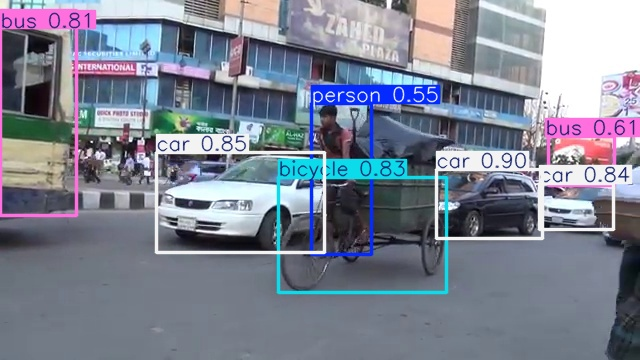

In [40]:
Image.open(location_of_results / "frame_1050.jpg")

Notice how each class uses a different color, the labels are displayed, along with the confidence of the bounding box.

**Task 3.3.14:** Display image `frame_2575.jpg` with its drawn bounding boxes.

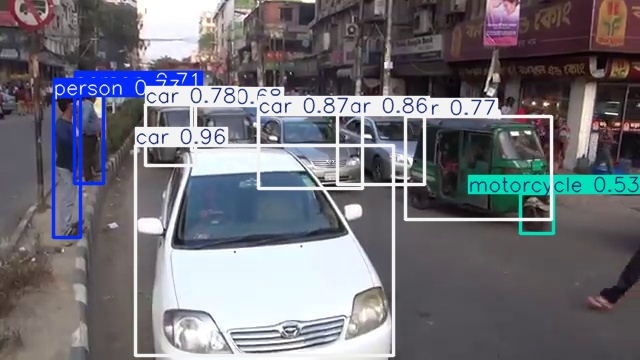

In [41]:
# Display image frame_2575.jpg with the bounding boxes
Image.open(location_of_results / "frame_2575.jpg")

The bounding boxes were saved as a text file.

In [42]:
with (location_of_results / "labels" / "frame_1050.txt").open("r") as f:
    print(f.read())

2 0.764822 0.567356 0.16416 0.191139
2 0.37569 0.561645 0.261955 0.278395
2 0.901125 0.57437 0.115646 0.129017
1 0.566428 0.652769 0.262519 0.317479
5 0.0604546 0.313508 0.119466 0.570889
5 0.908251 0.447686 0.102479 0.135607
0 0.532939 0.497225 0.0939376 0.419181



The first column is the class, followed by 4 columns defining the bounding box.

**Task 3.3.15:** Display the text file results for the bounding box for `frame_2575.jpg`.

In [43]:
with (location_of_results / "labels" / "frame_2575.txt").open("r") as f:
    print(f.read())


2 0.413234 0.695446 0.403302 0.58246
2 0.484847 0.421423 0.163283 0.204253
2 0.595295 0.414594 0.135674 0.193444
2 0.266838 0.373886 0.0775616 0.169089
2 0.74819 0.466358 0.227984 0.285972
0 0.104577 0.463135 0.0432231 0.39213
0 0.139043 0.379178 0.0446077 0.262667
2 0.351648 0.354532 0.105288 0.124523
3 0.838957 0.592829 0.0514652 0.112449



### Using YOLO on Multiple Images and Video Source

We're ready to move on to using YOLO for identifying objects across multiple images. For convenience, we'll define a function that accepts a directory of images and displays them in a grid.

In [ ]:
def display_sample_images(dir_path, sample=5):
    dir_path = Path(dir_path) if isinstance(dir_path, str) else dir_path

    image_list = []
    # Sort the images to ensure they are processed in order
    images = sorted(dir_path.glob("*.jpg"))
    if not images:
        return None

    # Iterate over the first 'sample' images
    for img_path in images[:sample]:
        img = read_image(str(img_path))
        resize_transform = transforms.Resize((240, 240))
        img = resize_transform(img)
        image_list.append(img)

    # Organize the grid to have 'sample' images per row
    Grid = make_grid(image_list, nrow=5)
    # Convert the tensor grid to a PIL Image for display
    img = torchvision.transforms.ToPILImage()(Grid)
    return img

With this function defined, let's use it for the first 25 frames we extracted from the video.

In [ ]:
display_sample_images(data_dir, sample=25)

**Task 3.3.16:** Use `display_sample_images` to display the first ten frames in a grid.

In [ ]:
# Display the first ten images


We'll create a list of the path of 25 images from the extracted frames.

In [ ]:
images_path = list(data_dir.iterdir())[:25]
images_path

**Task 3.3.17:** Create a list of the _last_ ten frames as listed by `data_dir.iterdir()`.

In [ ]:
images_path_task = ...

print(f"Number of frames in list: {len(images_path_task)}")
images_path_task

We'll once again use `yolo.predict` but this time we'll make use of two additional arguments to control where the results are saved. By using `project` and `name`, the saved results will be in `project/name`.

In [ ]:
results = yolo.predict(
    images_path,
    conf=0.5,
    save=True,
    save_txt=True,
    project=Path("runs", "detect"),
    name="multiple_frames",
)

In [ ]:
print(results[0].save_dir)

You can see how the output includes a summary of the results for each of the 25 frames.

**Task 3.3.18:** Use `yolo.predict` on `images_path_task`. Save the results to `runs/detect/multiple_frames_task`.

In [ ]:
results_task = ...

print(f"\nResults from task saved to: {results_task[0].save_dir}")

With our `display_sample_images` function, we can display the results.

In [ ]:
image = display_sample_images(results[0].save_dir, sample=25)
image

You can see how YOLO did a good job at detecting the different objects.

**Task 3.3.19:** Display the images with the bounding boxes with `display_sample_images` for the results generated in the previous task. Make sure to set `sample` to 10.

In [ ]:
image_task = ...

Now let's try to use YOLO on a video source instead of the frames extracted from a video. The cell below displays the video.

In [ ]:
video_path = Path("data_video", "dhaka_traffic.mp4")
Video(video_path)

To speed things up, we're going to truncate our video and run YOLO against the truncated version. We'll use `ffmpeg`, a command line tool for video and audio editing. The part that controls the timestamps for truncation are the numbers that follow `-ss` and `-to`. The number after `-ss` is the starting timestamp and `-to` is the ending timestamp. The value `data_video/dhaka_traffic_truncated.mp4` is the path of the created file.

In [ ]:
!ffmpeg -ss 00:00:00 -to 00:00:30 -y -i $video_path -c copy data_video/dhaka_traffic_truncated.mp4

In [ ]:
video_truncated_path = Path("data_video", "dhaka_traffic_truncated.mp4")
Video(video_truncated_path)

**Task 3.3.20:** Truncate the same video as above but from the `00:00:30` to `00:01:00` timestamp and name the video `data_video/dhaka_traffic_truncated_task.mp4`.

In [ ]:
!ffmpeg ...

video_truncated_path_task = Path("data_video", "dhaka_traffic_truncated_task.mp4")
Video(video_truncated_path_task)

To use YOLO on a video source, we just need to tell it the location of the video and set `stream` to True.

In [ ]:
results_video = yolo.predict(
    video_truncated_path,
    conf=0.5,
    save=True,
    stream=True,
    project=Path("runs", "detect"),
    name="video_source",
)

Unlike before, the returned value of `yolo.predict` is a generator rather than a list. Detection happens only as we iterate over the generator, giving us control over when the actual computation takes place.

In [ ]:
for result in results_video:
    continue

Since we saved the results, YOLO created a video. In the next section, we'll look at the video that YOLO produces.

### Using YOLO in the Command Line

YOLO has a command line interface. This is great if we are working with shell scripts. You can see how its usage is very similar to what we saw earlier.

In [ ]:
!yolo task=detect mode=predict conf=0.5 model=yolov8s.pt source=$video_truncated_path project="runs/detect" name="command_line" > /dev/null

<div class="alert alert-info" role="alert">
If you look at the end, you'll see <code>> /dev/null</code>. This redirects the output of running YOLO from the screen to the device called null. This device is basically a black hole where it destroys anything written to it. The output that would've appeared would've been the same as we saw earlier when running YOLO in Python.
</div>

YOLO will create a video of the source video with the bounding boxes. Before we display the video, we'll need to convert it to an mp4 as that format provides better compression. Better compression leads to a smaller file size. The notebook environment might have issues with playing large files. Once again, `ffmpeg` is the tool to use.

In [ ]:
!ffmpeg -y -i runs/detect/command_line/dhaka_traffic_truncated.avi output.mp4

In [ ]:
Video("output.mp4")

Notice how the video contains the bounding boxes on the detected objects.

**Task 3.3.21:** Use YOLO in the command line for the truncated video. You'll need to change `source` to be `$video_truncated_path_task` and the `name` to be `command_line_task`.

In [ ]:
!yolo ...

# This will convert your video to mp4 and display it in the notebook
!ffmpeg -y -i runs/detect/command_line_task/dhaka_traffic_truncated_task.avi output_task.mp4
Video("output_task.mp4")

---
This file &#169; 2024 by [WorldQuant University](https://www.wqu.edu/) is licensed under [CC BY-NC-ND 4.0](https://creativecommons.org/licenses/by-nc-nd/4.0/).